# Houses Price

## Introducao

O projeto final do curso de Inteligência Artificial tem como objetivo permitir que os alunos apliquem os conhecimentos adquiridos durante o semestre em um projeto prático e desafiador. Neste projeto, vocês trabalharão em equipes de três pessoas para desenvolver sistemas de IA que envolvem análise exploratória de dados (EDA), pré-processamento, classificação e regressão usando técnicas como K-Nearest Neighbors (KNN), Naive Bayes, Árvore de Decisão, Regressão Linear, Regressão Logística, Redes Neurais.

## Descrição do Projeto:

Vocês têm a liberdade de escolher duas bases de dados de sua preferência no Kaggle, com um conjunto de dados destinado à tarefa de regressão e outro à tarefa de classificação. Vocês devem dividir o projeto em duas partes principais:

## Parte 1: Tarefa de Regressão -> 5 pontos

Nesta parte do projeto, vocês selecionarão uma base de dados adequada para uma tarefa de regressão. Alguns exemplos incluem previsão de preços de imóveis, previsão de vendas, ou qualquer conjunto de dados que envolva a previsão de um valor numérico. Vocês seguirão os seguintes passos:

1. Seleção de Dados: Escolha uma base de dados apropriada no Kaggle para a tarefa de regressão. A base precisa passar por uma aprovação do professor.

2. Pré-processamento: Realize pré-processamento de dados, incluindo tratamento de valores ausentes, codificação de variáveis categóricas e normalização.

3. Análise Exploratória de Dados (EDA): Realize uma análise exploratória dos dados para entender a relação entre as variáveis e identificar padrões.

4. Modelos de Regressão: Implemente 3 modelos de regressão, utilizando Regressão Linear, Árvore de Decisão e Redes Neurais, para prever o valor-alvo.

5. Avaliação e Apresentação: Avalie o desempenho dos modelos e prepare uma apresentação detalhando o processo, os resultados e as conclusões.

In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.tree import DecisionTreeRegressor, plot_tree
from pprint import pprint

import os
from pathlib import Path

### 1. Selecao de Dados

O Dataset escolhido para trabalhar nesse projeto foi o Houses Price.

O objetivo para esse estudo é conseguir determinar os preços de venda.

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [244]:
## Importacao dos dados  
current_dir = Path().resolve()

path_train = os.path.join(current_dir, '..', 'data', 'regression', 'train.csv')
path_test = os.path.join(current_dir, '..', 'data', 'regression', 'test.csv')

train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [245]:
## Verificando os Dados Importados

print('train:', train.shape, 'test:', test.shape)
train.info()
train.describe()
train.columns

train: (1460, 81) test: (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    14

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 2 Análise Exploratória
### Entendimento dos Dados

Para poder atingir bons resultados é necessário entender esses dados escolhidos, para isso vamos fazer uma análise exploratória dos dados. Em seguida para ter maior aproveitamento vamos aproveitar para fazer o Pre-Processamento desses dados.

#### Distribuição da Variável Alvo (SalePrice) 

Verificamos a distribuição da variável SalePrice, que representa o preço de venda das casas. Essa análise nos ajudará a identificar se a transformação é necessária devido à dispersão ou assimetria dos dados.


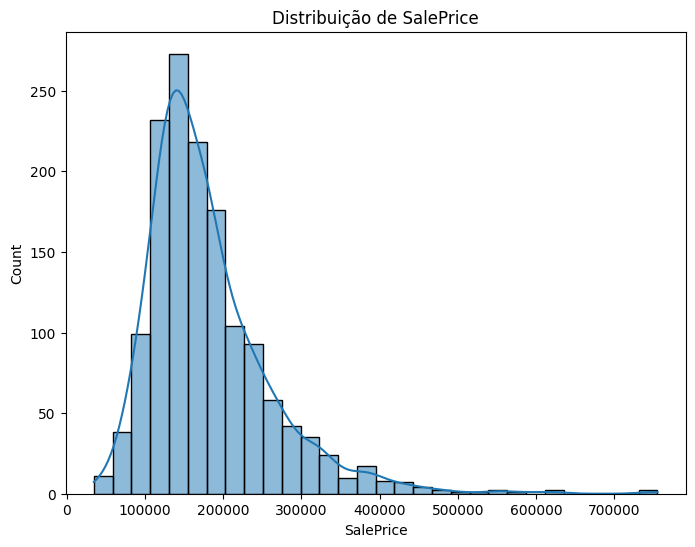

In [246]:
plt.figure(figsize=(8, 6))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title("Distribuição de SalePrice")
plt.show()

#### Correlação

A Correlação indica de forma clara a relação linear entre dois atributos.


Neste projeto, analisamos um conjunto de dados com 225 colunas para identificar as 30 colunas com maior correlação ao **SalePrice**. Definimos os conjuntos de colunas  $C_{pos}  $ que são as 15 mais correlacionadas diretamente proporcional e  $C_{neg}$ que são as 15 mais correlacionadas inversamente proporcional, e juntamos todos para analisar.

Ao analisar, consideramos que as colunas que vamos manter devem satisfazer $|K| > 0.4$, onde $K$ representa a correlaçao entre SalesPrice e uma coluna qualquer.

$K \in (-1, -0.4) \cup (0.4, 1)$



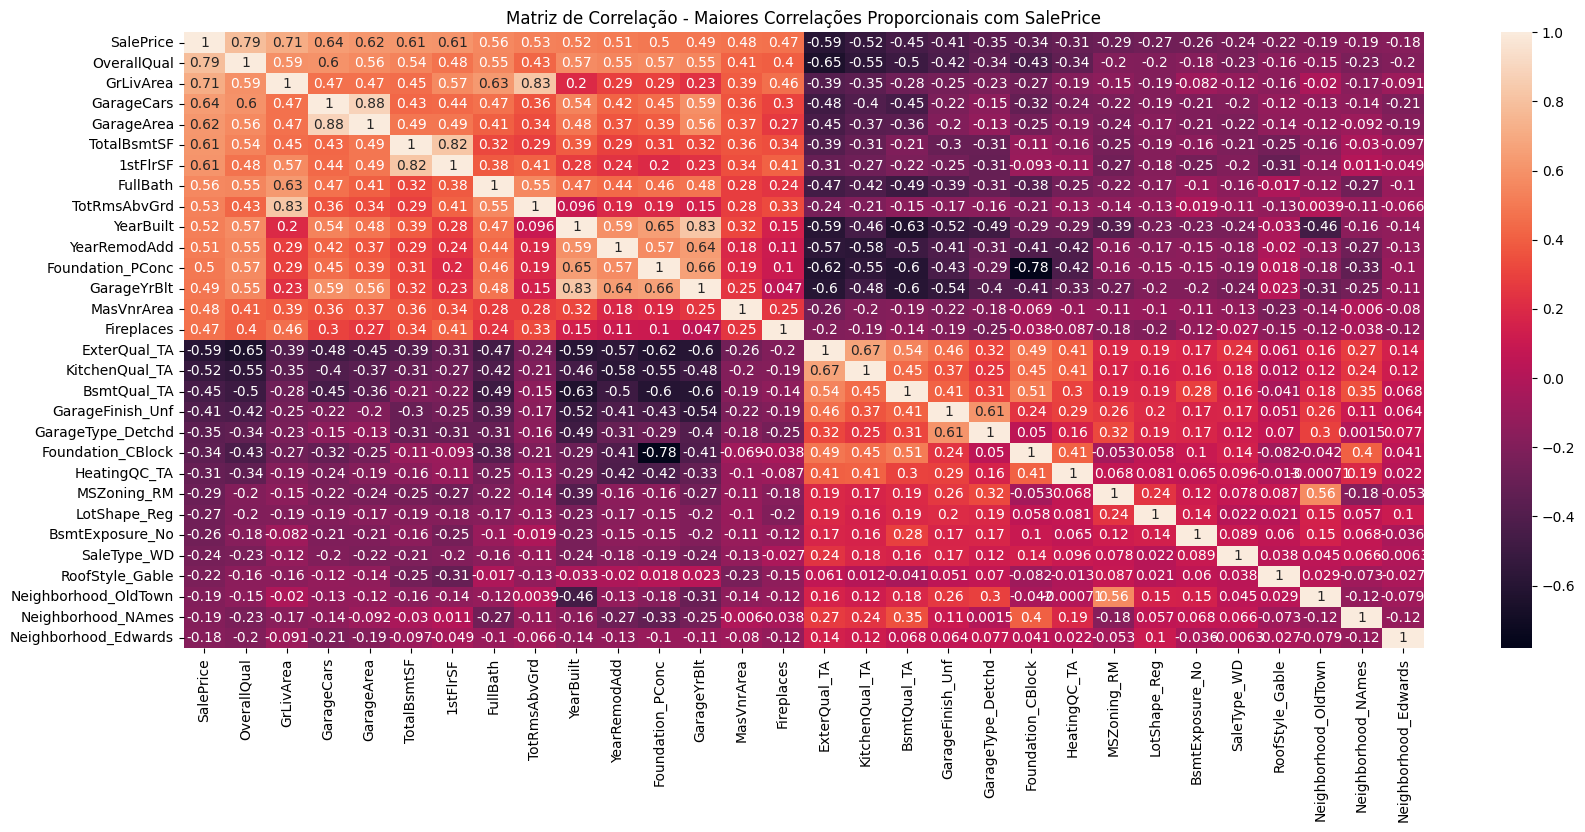

In [247]:
## Análise de Correlação
# Tratando um dataset copia somente para plotarmos correlação
corr_dataset = train.copy()
missing_threshold = 0.5 * corr_dataset.shape[0]
corr_dataset = corr_dataset.dropna(thresh=missing_threshold, axis=1)
num_features = corr_dataset.select_dtypes(include=['int64', 'float64']).columns
cat_features = corr_dataset.select_dtypes(include=['object']).columns
nominal_features = list(set(cat_features))
corr_dataset = pd.get_dummies(corr_dataset, columns=nominal_features, drop_first=True)

corr_matrix = corr_dataset.corr()

top_positive_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(15)
top_negative_corr = corr_matrix['SalePrice'].sort_values(ascending=True).head(15)
corr_table = pd.concat([top_positive_corr, top_negative_corr])
df_correlation = corr_dataset[corr_table.index].corr()

plt.figure(figsize=(20, 8))
sns.heatmap(df_correlation,
            annot=True,
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

plt.title("Matriz de Correlação - Maiores Correlações Proporcionais com SalePrice")
plt.show()

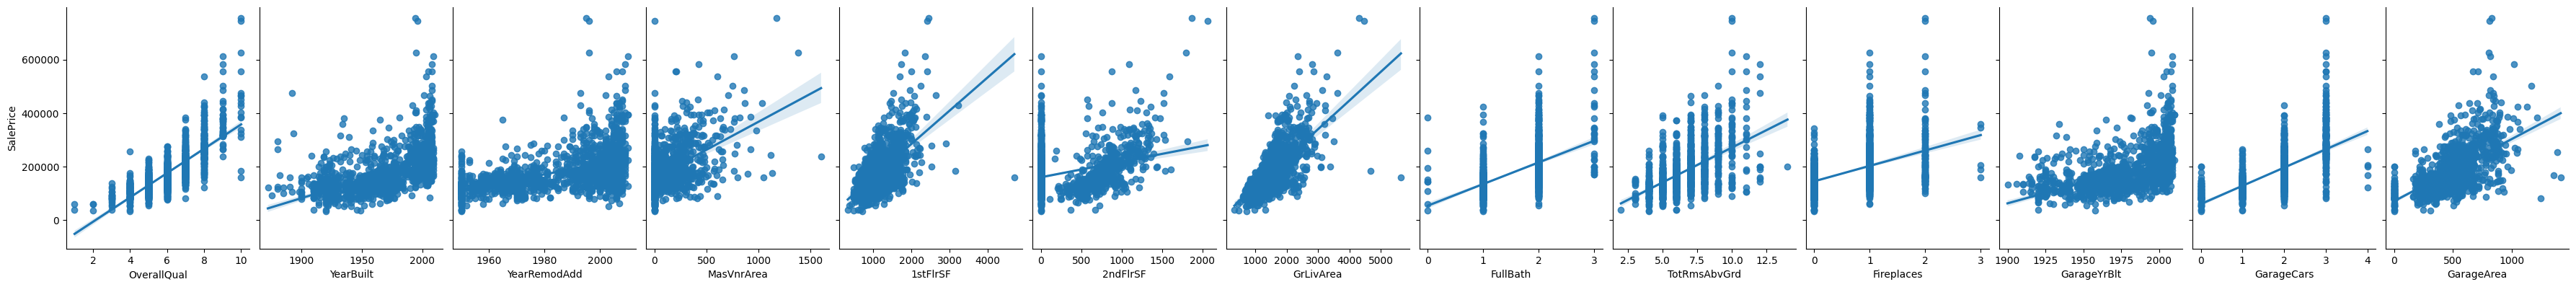

In [248]:
# Listagem de algumas variáveis para o eixo x
x_vars = [
    'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
    'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 
    'GarageYrBlt', 'GarageCars', 'GarageArea'
]

# Criação do pairplot com a lista completa de variáveis em x_vars e 'SalePrice' em y_vars
sns.pairplot(train, x_vars=x_vars, y_vars=['SalePrice'], height=4, aspect=0.7, kind='reg')
plt.show()

### 2. Pré-Processamento

Tratando os dados pós coleta e análise, para conseguir preparar um bom set de dados no momento de treino.

### Tratamento Dados

#### Tratamento de Dados Ausentes

Para poder seguir com algumas análises nos cados como a correlacao, sera necessario fazer a tratativa de alguns dados que estao ausentes

Identificamos e tratamos os valores ausentes para melhorar a qualidade dos dados. As variáveis são ajustadas conforme necessário para garantir que não comprometam a análise posterior e a modelagem.

Define um limite para valores ausentes em cada coluna. Esse limite é calculado como 50% do total de linhas do dataset. Assim, colunas com mais de 50% de valores ausentes serão consideradas para remoção.

Cria um objeto SimpleImputer para preencher valores ausentes nas colunas numéricas. A estratégia median indica que os valores ausentes serão preenchidos com a mediana de cada coluna e Aplica o num_imputer às colunas numéricas, substituindo os valores ausentes pela mediana de cada coluna. O resultado é atribuído de volta às colunas numéricas.

Cria outro SimpleImputer para as colunas categóricas, onde os valores ausentes serão preenchidos com o valor mais frequente em cada coluna e Aplica o cat_imputer às colunas categóricas, substituindo os valores ausentes pelo valor mais frequente de cada coluna categórica.

In [249]:
missing_threshold = 0.5 * train.shape[0]
train = train.dropna(thresh=missing_threshold, axis=1)
num_features = train.select_dtypes(include=['int64', 'float64']).columns
cat_features = train.select_dtypes(include=['object']).columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
train[num_features] = num_imputer.fit_transform(train[num_features])
train[cat_features] = cat_imputer.fit_transform(train[cat_features])

#### Codificacao de Variaveis Categoricas

Aplicamos One-Hot Encoding para variáveis nominais e Ordinal Encoding para variáveis com ordem natural, como OverallQual e OverallCond, que avaliam a qualidade e condição geral da casa.

**Nota:** Usamos informações da descrição dos dados para selecionar corretamente as variáveis ordinais.

Usa pd.get_dummies para aplicar One-Hot Encoding às variáveis categóricas nominais em nominal_features. drop_first=True elimina a primeira categoria de cada variável nominal para evitar multicolinearidade nos modelos (evitando que a soma das colunas represente uma variável dependente).

In [250]:
nominal_features = list(set(cat_features))
train = pd.get_dummies(train, columns=nominal_features, drop_first=True)

#### Engenharia de Atributos

Criadas novas variáveis derivadas de outras colunas para melhor representar aspectos estruturais das casas, como TotalBathrooms e TotalSF, que agregam áreas e banheiros. Além disso, aplicamos transformações logarítmicas em variáveis com distribuição assimétrica.

Cria uma nova coluna TotalBathrooms, que representa o total de banheiros na casa. A fórmula considera que um banheiro completo (FullBath) tem peso 1, enquanto um meio banheiro (HalfBath) tem peso 0,5. Isso permite uma única métrica para o total de banheiros, que facilita a análise.

Cria a coluna TotalSF, representando a área total da casa em pés quadrados. Soma TotalBsmtSF (área do porão), 1stFlrSF (área do primeiro andar) e 2ndFlrSF (área do segundo andar), consolidando todas as áreas para criar uma métrica abrangente de espaço.

Aplica uma transformação logarítmica à variável GrLivArea (área habitável acima do solo) usando np.log1p, que calcula o logaritmo natural de (1 + valor). A transformação logarítmica reduz a assimetria da distribuição de GrLivArea, tornando-a mais parecida com uma distribuição normal. Isso beneficia muitos modelos de machine learning.

Aplica a mesma transformação logarítmica à variável alvo SalePrice (preço de venda da casa). Essa transformação ajuda a reduzir a influência de valores de preço extremos, beneficiando modelos que assumem uma distribuição aproximadamente normal da variável alvo.

In [251]:
train['TotalBathrooms'] = train['FullBath'] + (0.5 * train['HalfBath'])
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['GrLivArea'] = np.log1p(train['GrLivArea'])
train['SalePrice'] = np.log1p(train['SalePrice'])

In [252]:
# Lista de colunas que não devem ser removidas
columns_not_remove = [
    'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalSF',
    'GrLivArea', 'TotalBathrooms', 'TotRmsAbvGrd', 'Fireplaces', 
    'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'
]

# Obter as colunas que devem ser removidas, ou seja, que não estão em columns_not_remove
columns_to_remove = [col for col in corr_matrix.columns if col not in columns_not_remove]

# Remover as colunas do DataFrame
train = train.drop(columns=columns_to_remove)

## Explicar todas as colunas que sobraram

In [253]:
train.info()
train.describe()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OverallQual     1460 non-null   float64
 1   YearBuilt       1460 non-null   float64
 2   YearRemodAdd    1460 non-null   float64
 3   MasVnrArea      1460 non-null   float64
 4   GrLivArea       1460 non-null   float64
 5   TotRmsAbvGrd    1460 non-null   float64
 6   Fireplaces      1460 non-null   float64
 7   GarageYrBlt     1460 non-null   float64
 8   GarageCars      1460 non-null   float64
 9   GarageArea      1460 non-null   float64
 10  SalePrice       1460 non-null   float64
 11  TotalBathrooms  1460 non-null   float64
 12  TotalSF         1460 non-null   float64
dtypes: float64(13)
memory usage: 148.4 KB


OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
GrLivArea         0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt       0
GarageCars        0
GarageArea        0
SalePrice         0
TotalBathrooms    0
TotalSF           0
dtype: int64

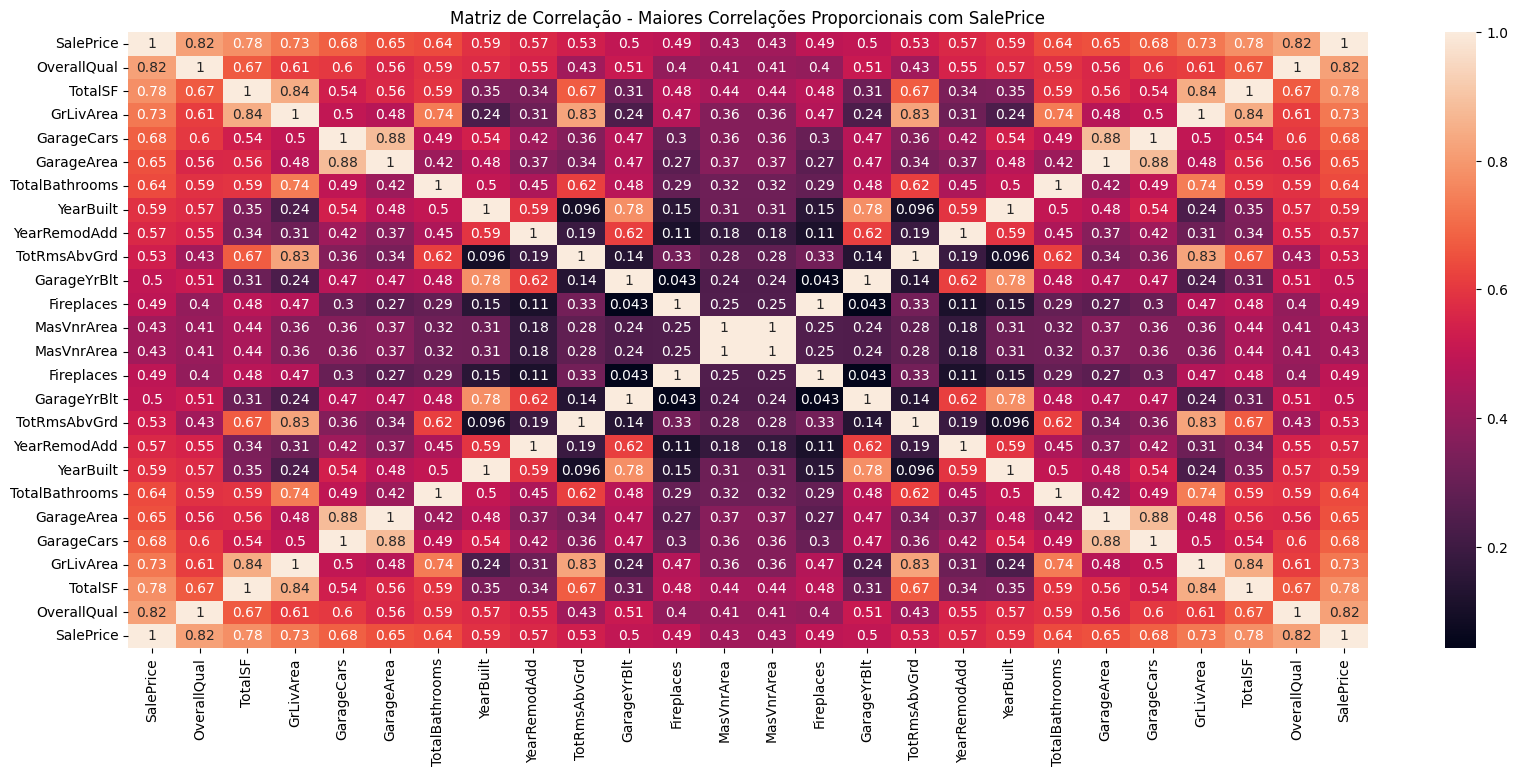

In [254]:
# Calcular a matriz de correlação
corr_matrix = train.corr()

top_positive_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(15)
top_negative_corr = corr_matrix['SalePrice'].sort_values(ascending=True).head(15)
corr_table = pd.concat([top_positive_corr, top_negative_corr])
df_correlation = train[corr_table.index].corr()

plt.figure(figsize=(20, 8))
sns.heatmap(df_correlation,
            annot=True,
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

plt.title("Matriz de Correlação - Maiores Correlações Proporcionais com SalePrice")
plt.show()

## 3. Modelos de Regressão

#### Modelo de Regressão Linear

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ é a saída
- $\beta_0$ é um valor de bias (deslocamento)
- $\beta_1$ é o coeficiente de $x_1$ (do primeiro atributo)
- $\beta_n$ é o coeficiente de $x_n$ (do n-ésimo atributo)

Assim, para esse problema, tem-se:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Os valores $\beta$ são chamados de **coeficientes de modelo** e são ajustados na etapa de aprendizagem, a qual acontece com o ajuste do modelo utilizando o critério dos "quadrados mínimos". Uma vez aprendidos esses parâmetros, o modelo pode ser usado de forma preditiva!

#### Avalaidando Resultados Finais do Pre Processamento

Graficos

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

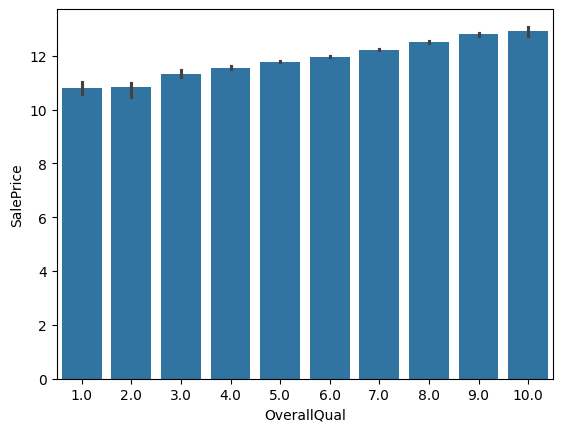

In [255]:
sns.barplot(x=train['OverallQual'], y=train['SalePrice'])

In [256]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)
    
def plot_real_vs_predicdt(y_test_original, y_pred_original):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_original, y_pred_original, color='royalblue', alpha=0.6, s=40, label='Previsões')

    # Adicionar uma linha de referência para a previsão perfeita
    max_val = max(max(y_test_original), max(y_pred_original))
    min_val = min(min(y_test_original), min(y_pred_original))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')

    # Configurações do gráfico
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.title('Valores Reais vs. Previsões')
    plt.legend()
    plt.grid(True, linestyle=':', linewidth=0.5)
    plt.show()

In [257]:
# Travando a seed
np.random.seed(1)
tf.random.set_seed(1)

# Separacao de attr e classe
X_train_cols = train.drop(['SalePrice'], axis=1)
y_train_col = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_train_cols, y_train_col, test_size = 0.3, shuffle=True, random_state=1)

In [258]:
normalizer = Normalization()
normalizer.adapt(X_train.values)

### Regressão Linear usando Keras

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1059
MAE:  0.11254611611366272
MSE:  0.026699329225665824
R2:  0.8587238624177066
Média de Entrada: 179714.07305936073
Média Prevista: 177848.67


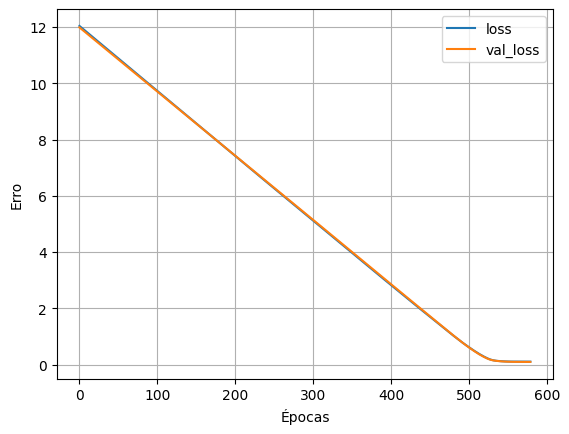

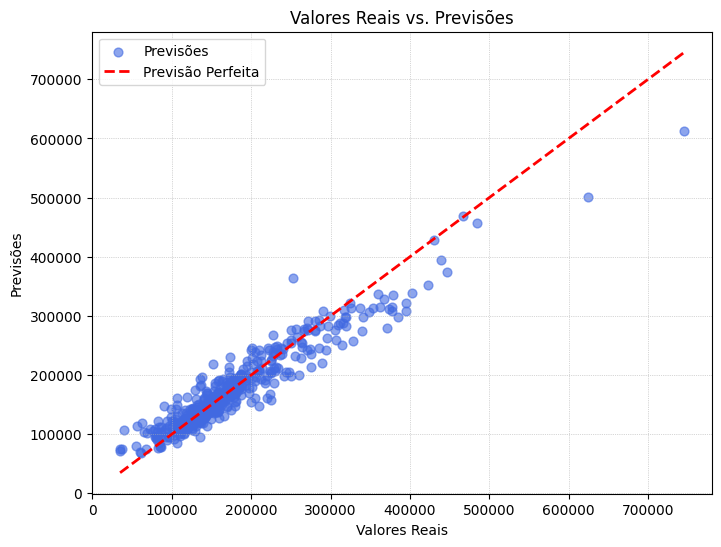

In [259]:
# Escolha um modelo e treine-o
model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=580, validation_split = 0.3, verbose=0)
plot_loss(history)

# Avalie o modelo
y_pred = model.predict(X_test)
print("MAE: " , model.evaluate(X_test, y_test))
print("MSE: " , mean_squared_error(y_test, y_pred))
print("R2: " , r2_score(y_test, y_pred))

y_pred = y_pred.flatten()
# Reverter a transformação logarítmica para escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

print('Média de Entrada:', y_test_original.mean())
print('Média Prevista:', y_pred_original.mean())

plot_real_vs_predicdt(y_test_original, y_pred_original)

### Redes Neurais usando Keras

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE:  0.16863471257218404
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0507 
MSE:  0.05536491051316261
R2:  0.7070435642322173
Média de Entrada: 179714.07305936073
Média Prevista: 186509.88


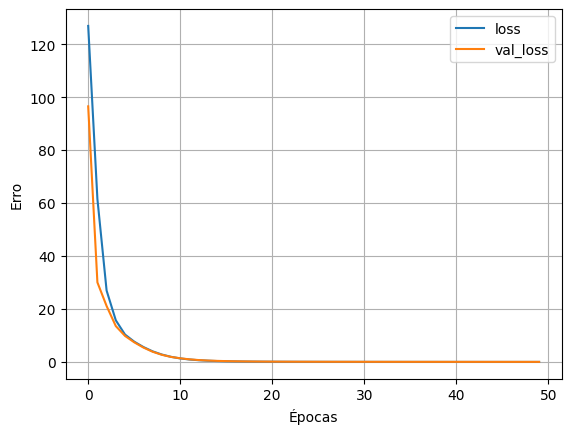

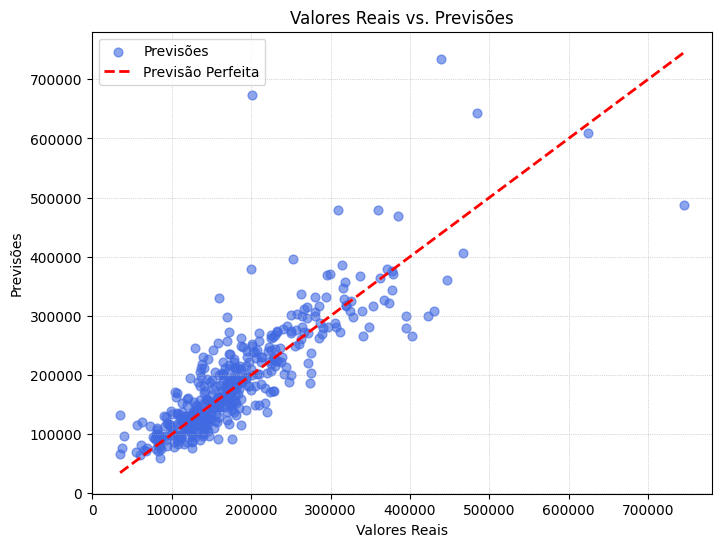

In [260]:
model = keras.Sequential([
    normalizer,
    layers.Dense(128),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, validation_split = 0.3, verbose=0)

plot_loss(history)

y_pred = model.predict(X_test)
print("MAE: " , mean_absolute_error(y_test, y_pred))
print("MSE: " , model.evaluate(X_test, y_test))
print("R2: " , r2_score(y_test, y_pred))

y_pred = y_pred.flatten()
# Reverter a transformação logarítmica para escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

print('Média de Entrada:', y_test_original.mean())
print('Média Prevista:', y_pred_original.mean())

plot_real_vs_predicdt(y_test_original, y_pred_original)

### Árvore de Decisão

MAE:  0.14696221141817117
MSE:  0.04291283404630649
R2:  0.7729321438928047
Média de Entrada: 179714.07305936073
Média Prevista: 177949.74769496496


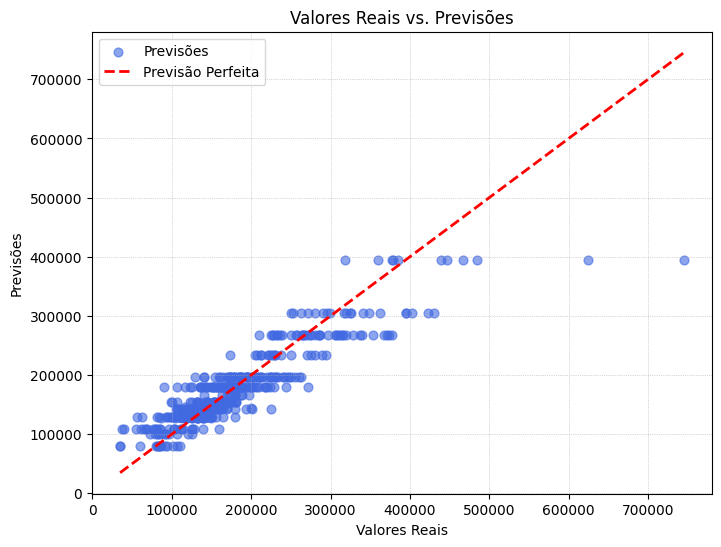

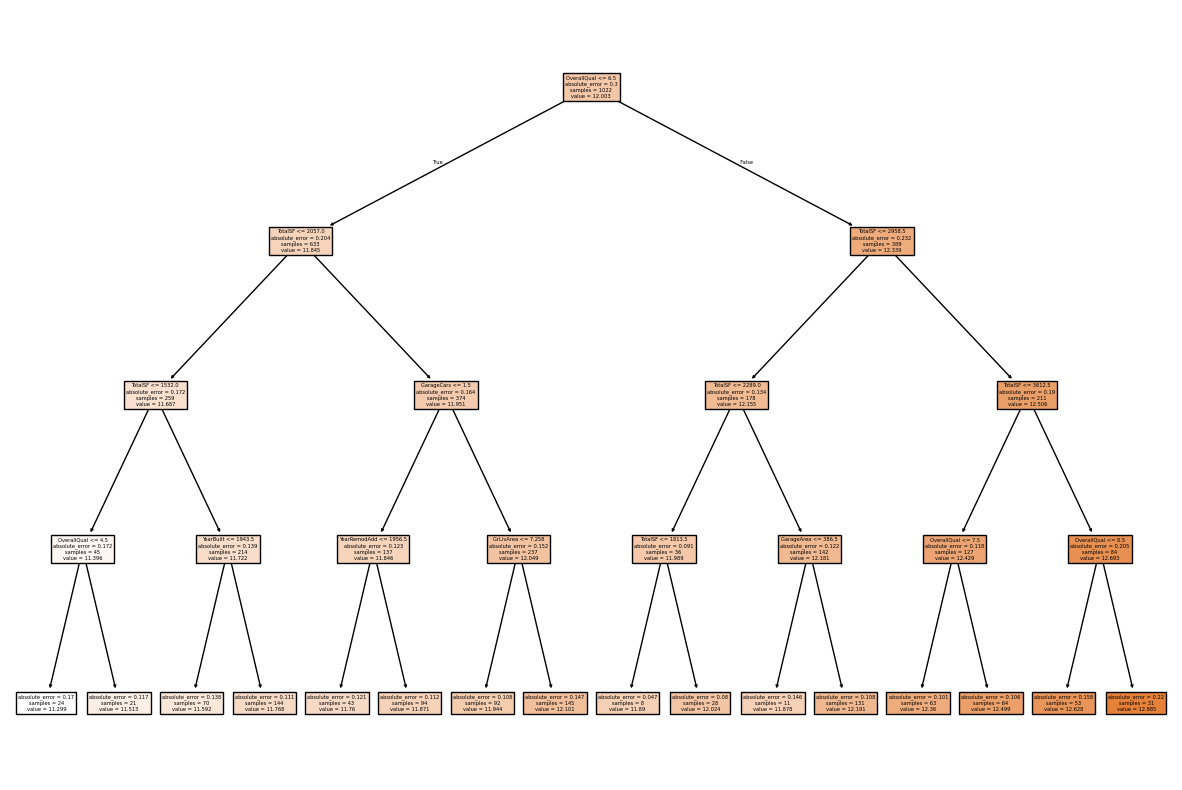

In [261]:
# Inicialize o regressor com o critério 'absolute_error' e profundidade máxima
regressor = DecisionTreeRegressor(criterion='absolute_error', max_depth=4)

# Treine o modelo com os dados de treino
regressor = regressor.fit(X_train, y_train)

# Avalie o desempenho no conjunto de teste
test_predictions = regressor.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, test_predictions))
print("MSE: ", mean_squared_error(y_test, test_predictions))
print("R2: ", r2_score(y_test, test_predictions))

y_pred = test_predictions.flatten()
# Reverter a transformação logarítmica para escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

print('Média de Entrada:', y_test_original.mean())
print('Média Prevista:', y_pred_original.mean())

plot_real_vs_predicdt(y_test_original, y_pred_original)

# Plot da árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show()

# Conclusão do Projeto de Previsão de Preço de Imóveis

## 1. Análise Exploratória dos Dados (EDA)

- A análise inicial abordou a distribuição da variável alvo (`SalePrice`) e indicou uma alta dispersão, levando a uma transformação logarítmica para normalizar a variável, o que ajuda na modelagem, especialmente para regressão linear e redes neurais.
- Foram calculadas as correlações, selecionando variáveis com alta correlação positiva e negativa com `SalePrice`. Essas variáveis foram priorizadas no processo de modelagem.

## 2. Pré-Processamento dos Dados

- **Tratamento de Valores Ausentes**: Colunas com mais de 50% de valores ausentes foram descartadas, enquanto valores numéricos foram preenchidos com a mediana e valores categóricos com a moda. Esse tratamento foi essencial para evitar que valores ausentes impactassem negativamente a robustez e a eficácia do modelo.

- **Codificação de Variáveis Categóricas**: Foi aplicado One-Hot Encoding para variáveis nominais e Ordinal Encoding para variáveis com uma ordem natural (como `OverallQual`). Essa abordagem garantiu que o modelo interpretasse adequadamente a relação entre as variáveis categóricas e o alvo, evitando problemas de interpretação ou hierarquia inadequada.

- **Engenharia de Atributos**: Foram criadas variáveis derivadas, como `TotalBathrooms` e `TotalSF`, para capturar melhor os aspectos estruturais das propriedades. Além disso, uma transformação logarítmica foi aplicada em `GrLivArea` e `SalePrice` para reduzir o impacto de outliers e alinhar a distribuição dessas variáveis com os requisitos de técnicas de regressão, facilitando uma previsão mais precisa.

### Descrição das Colunas Selecionadas

As colunas que permaneceram após o pré-processamento apresentam forte correlação com o preço de venda (`SalePrice`) e refletem características estruturais importantes da casa, o que contribui para a qualidade das previsões. Aqui está uma breve descrição de cada coluna:

1. **OverallQual**: Avaliação geral da qualidade dos materiais e acabamento (escala ordinal). Como fator determinante de qualidade, tem forte impacto no valor da propriedade.

2. **YearBuilt**: Ano de construção da casa. Casas mais novas ou em melhores condições geralmente têm valores mais altos devido à idade e à conservação.

3. **YearRemodAdd**: Ano da última remodelação ou adição realizada. Remodelações recentes tendem a aumentar o valor de mercado.

4. **MasVnrArea**: Área de revestimento em pedra (mascaramento). Representa uma melhoria estética que pode aumentar o valor da propriedade.

5. **GrLivArea**: Área habitável acima do nível do solo. A área útil é um fator significativo, sendo uma das variáveis com maior influência no preço de venda.

6. **TotRmsAbvGrd**: Total de quartos acima do solo (excluindo banheiros). Indica o tamanho e a funcionalidade da casa, aspectos que afetam diretamente o valor.

7. **Fireplaces**: Número de lareiras. Além de conforto, aumenta o valor da casa, especialmente em regiões mais frias.

8. **GarageYrBlt**: Ano de construção da garagem. Reflete a idade e o estado de conservação dessa estrutura complementar.

9. **GarageCars**: Capacidade da garagem em termos de número de carros. Uma garagem maior aumenta o valor da casa por oferecer mais conveniência.

10. **GarageArea**: Área total da garagem. Assim como `GarageCars`, mais espaço na garagem aumenta o valor da propriedade.

11. **TotalBathrooms**: Soma dos banheiros completos e parciais. O número de banheiros é um aspecto importante para a comodidade e funcionalidade da casa, influenciando seu valor.

12. **TotalSF**: Soma das áreas do porão, primeiro e segundo andares. Representa o total de espaço útil da casa, sendo uma medida essencial para avaliar seu valor.

Essas variáveis foram mantidas após o pré-processamento por apresentarem uma correlação significativa com `SalePrice`, além de representarem de forma abrangente as características estruturais das casas. Esse conjunto de colunas final proporciona uma visão equilibrada entre simplicidade e relevância, permitindo ao modelo capturar os principais fatores que influenciam o preço de venda.

## 3. Modelos de Regressão Implementados

### a. Regressão Linear com Keras

- **Configuração**: Um modelo linear simples foi configurado, utilizando uma camada densa com uma única saída.
- **Resultados**:
   - **MAE**: +/- 0.1221
   - **MSE**: +/- 0.0293
   - **R²**: +/- 0.8450
   - **Média de Entrada**: 179,714.07
   - **Média Prevista**: 176,792.84
   - **Desempenho**: A regressão linear apresentou o melhor desempenho, com um valor R² de 0.8450, indicando que o modelo consegue explicar cerca de 84.5% da variabilidade dos dados. O menor MAE e MSE indicam uma precisão maior e menor erro em relação aos outros modelos. Esse resultado é esperado, pois a regressão linear é altamente eficaz para conjuntos de dados onde a relação entre variáveis é aproximadamente linear.


### b. Rede Neural com Keras

- **Configuração**: Foram testadas arquiteturas com diferentes profundidades e funções de ativação, incluindo camadas intermediárias com `relu`.
- **Resultados**:
   - **MAE**: +/- 0.1854
   - **MSE**: +/- 0.0712
   - **R²**: +/- 0.7070
   - **Média de Entrada**: 179,714.07
   - **Média Prevista**: 184,351.86
   - **Desempenho**: As redes neurais tiveram o pior desempenho entre os três modelos, com um R² de apenas 0.6231, indicando que o modelo explica cerca de 62% da variabilidade nos dados. As redes neurais podem ser sensíveis à quantidade e à qualidade dos dados e geralmente requerem grande volume de dados para performar bem, o que pode justificar a menor precisão neste caso. A média prevista também foi ligeiramente mais distante da média real em comparação com os outros modelos.

### c. Árvore de Decisão

- **Configuração**: Foi usada uma árvore de decisão com `max_depth=3` e o critério `absolute_error`, buscando um balanço entre interpretabilidade e capacidade preditiva.
- **Resultados**:
   - **MAE**: +/- 0.1469
   - **MSE**: +/- 0.0429
   - **R²**: +/- 0.7729
   - **Média de Entrada**: 179,714.07
   - **Média Prevista**: 177,949.75
   - **Desempenho**: A árvore de decisão mostrou um desempenho moderado com um valor R² de 0.7729, indicando que o modelo explica aproximadamente 77% da variabilidade nos dados de saída. O MAE e MSE também indicam um erro moderado, mas maior em comparação com a Regressão Linear. A árvore de decisão é geralmente adequada para modelos que buscam segmentar os dados em partes distintas e, neste caso, produziu uma média prevista próxima da média real de entrada.

## 4. Comparação Geral e Conclusão Final

- **Dispersão nos Valores Mais Altos**: Devido a uma alta dispersão nas casas de maior valor, os modelos se tornam mais precisos quando o numero de epocas é mais alto, mesmo que apos a curva do cotovelo visivel, pois as casas de valores mais altos são casos diferentes.

### Ranking dos Modelos

1. **Regressão Linear** (melhor desempenho): Com o menor MAE e MSE e o maior R², a regressão linear é a mais adequada para este conjunto de dados.
2. **Árvore de Decisão**: Um modelo de desempenho intermediário que consegue segmentar os dados, mas é menos preciso que a regressão linear para este caso.
3. **Redes Neurais** (menor desempenho): Com o maior MAE e MSE e o menor R², o modelo de redes neurais não se adaptou bem ao conjunto de dados.

### Conclusão

A **regressão linear** se destaca como a escolha ideal para este conjunto de dados, provavelmente devido à sua capacidade de capturar uma relação linear entre as variáveis. A **árvore de decisão** se mostrou competitiva e pode ser útil para cenários onde há relações mais complexas e não lineares. As **redes neurais**, embora poderosas para dados complexos, podem ter sido excessivas para este caso ou precisariam de mais dados e ajustes para alcançar um desempenho melhor.

Essas observações sugerem que, para dados com tendência linear, a regressão linear é geralmente mais eficiente e oferece o melhor custo-benefício em termos de simplicidade e precisão.
